#### About the Data

- **Time** corresponds to the seconds between each transaction and the subsequent transaction made by the user.

- **V1-V28** are obfuscated columns pertaining to personal data and additional features that may contain sensitive - information.

- **Amount** refers to the transaction amount.

- **Class** is 1 for fraudulent transactions and 0 otherwise.

#### Info About Data

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

#### References
**https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/**

In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
# Exploring Datasets

In [5]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
58305,48324.0,1.266737,-0.532492,0.163635,-0.622617,-0.986961,-1.071500,-0.185838,-0.167797,-1.282376,...,-0.722444,-1.841828,0.273124,0.481139,-0.110303,0.591972,-0.092038,0.006488,52.49,0
276387,167061.0,1.585432,-0.619148,-1.979219,0.437192,0.157215,-0.456361,0.219231,-0.068624,0.743275,...,-0.079828,-0.496894,0.041044,0.582041,-0.173083,-0.159864,-0.049619,0.013482,212.12,0
145973,87319.0,1.260916,-1.595043,-2.668417,-0.888390,0.646065,0.368497,0.739736,-0.074974,0.321212,...,0.321437,0.224928,-0.245525,-1.542706,-0.227407,0.742793,-0.147555,-0.038969,400.00,0
53271,45898.0,1.065300,-0.645966,0.157997,-0.876503,-0.791267,-0.732644,-0.072452,-0.184605,1.610617,...,0.047625,0.139734,-0.285360,-0.071081,0.728759,-0.659684,0.055395,0.044733,128.68,0
208292,137052.0,2.047192,0.172947,-1.787791,0.211213,0.752178,-0.271205,0.134722,-0.106134,0.087769,...,-0.315007,-0.774454,0.284012,0.156223,-0.225182,0.174643,-0.056409,-0.042078,0.89,0


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().any().sum()

0

As we can see there is no null values present in the dataset

## Exploratory Data Analysis

### Describing the dataset

In [8]:
df.describe().T.style.bar(subset=['mean'], color='#E68193')\
                .background_gradient(subset=['std'], cmap='crest')\
                .background_gradient(subset=['50%'], cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Time,284807.000000,94813.859575,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.000000,0.000000,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.000000,0.000000,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.000000,-0.000000,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.000000,0.000000,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.000000,0.000000,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.000000,0.000000,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.000000,-0.000000,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.000000,0.000000,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.000000,-0.000000,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Comparison between amount of fraud and non fraudulant transactions

In [9]:
print("Number of Non-fradulent transcations: ", df[df['Class']==0].count()['Class'])
print("Number of fradulent transcations: ", df[df['Class']==1].count()['Class'])

Number of Non-fradulent transcations:  284315
Number of fradulent transcations:  492


Percentage of Non-fraud transaction (%): 99.82725143693798
Percentage of Fraud transaction (%): 0.1727485630620034


Text(0.5, 1.0, 'Transactions ( 0 : Non-fraud, 1 : Fraud )')

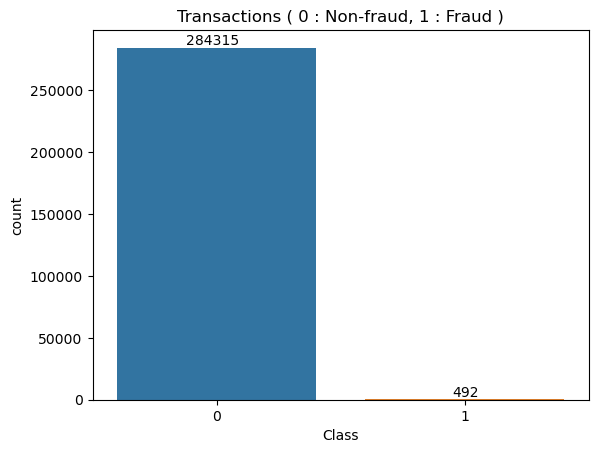

In [10]:
print("Percentage of Non-fraud transaction (%):", (df[df['Class']==0].count()['Class']/len(df))*100)
print("Percentage of Fraud transaction (%):", (df[df['Class']==1].count()['Class']/len(df))*100)
plt.text(-0.125,df[df['Class']==0].count()['Class']+2000, df[df['Class']==0].count()['Class'])
plt.text(0.95,df[df['Class']==1].count()['Class']+2000, df[df['Class']==1].count()['Class'])
sns.countplot(data = df, x = 'Class')
plt.title("Transactions ( 0 : Non-fraud, 1 : Fraud )")

It's a clear example of imbalanced problem.
If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. To balance it, we have SMOTE technique below.

### Correlation Heatmap

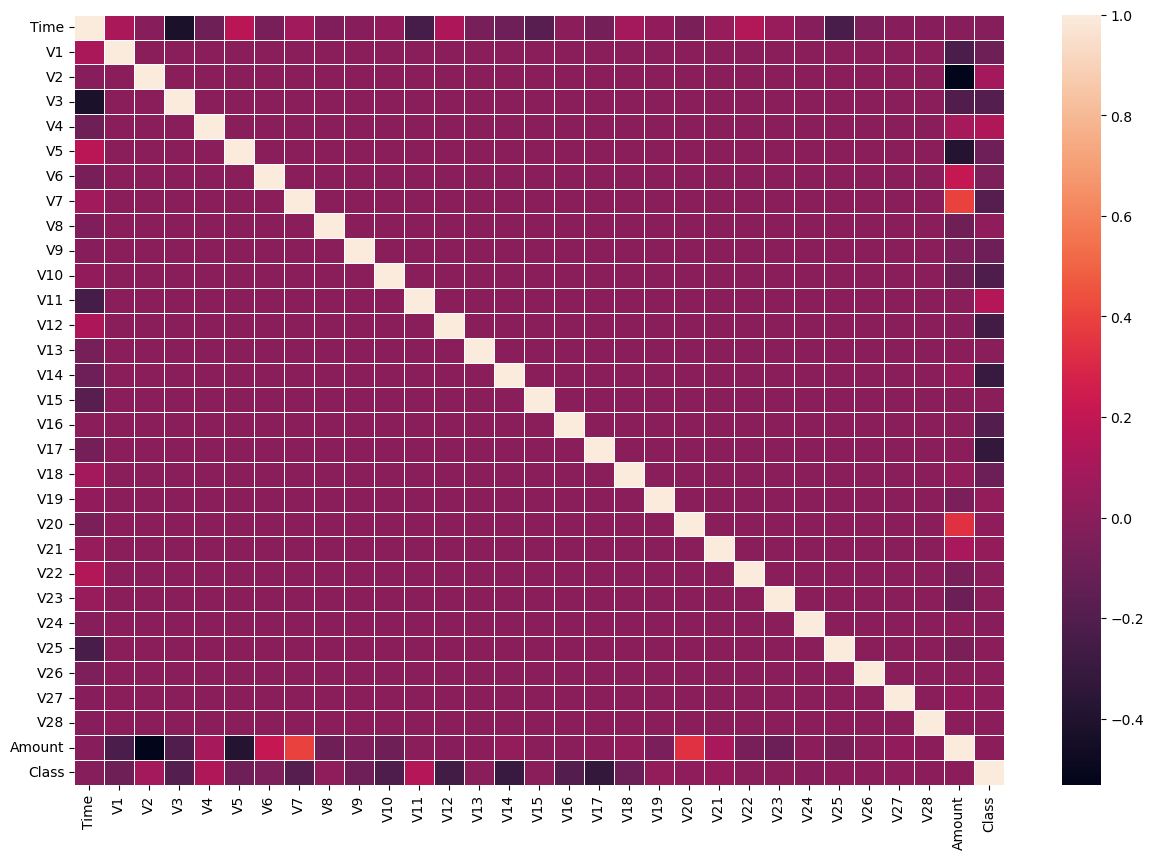

In [11]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, ax=ax, linewidths=.5)

plt.show()

From these column values, we can see that there are some very useful correlations present within our new dataset. While this doesn’t tell us anything specific, it does show that the data has trends we can use to improve the accuracy of our model.

## Outlier Detection

Text(0.5, 1.0, 'Box Plot - Transaction Amount')

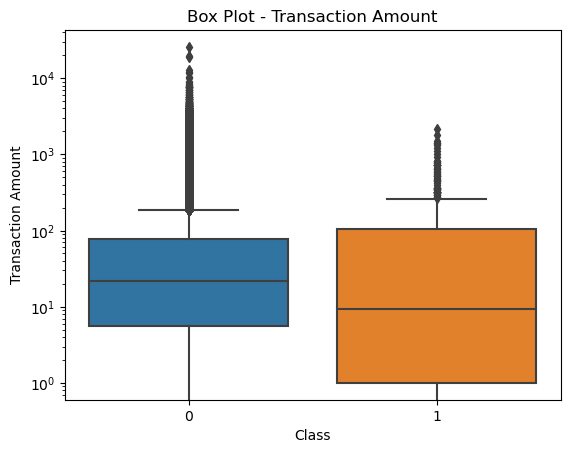

In [12]:
# Create a box plot of the transaction amount column
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')  # Set the y-axis to a logarithmic scale for better visualization
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.title('Box Plot - Transaction Amount')

In [13]:
# Calculate the upper and lower bounds for outliers using the interquartile range (IQR)
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
# Identify potential outliers based on the bounds
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

In [15]:
# Print the potential outliers
print('Potential Outliers:')
print(outliers)

Potential Outliers:
            Time        V1        V2        V3        V4        V5        V6  \
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
20          16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
51          36.0 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
64          42.0 -0.522666  1.009923  0.276470  1.475289 -0.707013  0.355243   
85          55.0 -4.575093 -4.429184  3.402585  0.903915  3.002224 -0.491078   
...          ...       ...       ...       ...       ...       ...       ...   
284735  172727.0 -1.661169 -0.565425  0.294268 -1.549156 -2.301359  2.365956   
284748  172738.0  1.634178 -0.486939 -1.975967  0.495364  0.263635 -0.713049   
284753  172743.0  1.465737 -0.618047 -2.851391  1.425282  0.893893 -0.958325   
284757  172745.0 -1.757643 -0.982659  1.091540 -1.409539 -0.662159  0.046930   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7   

Use outlier-resistant models such as Random Forest or Gradient Boosting are inherently robust to outliers. Using these models, we mitigate the effect of outliers without the need for explicit preprocessing steps. Still we have handled the outliers by replacing them with a threshold value. This approach allows us to keep the outliers in the dataset while assigning them a reasonable value. 

In [16]:
threshold = 3 * IQR  # Choose a threshold value, e.g., three times the IQR

# Replace outliers with the threshold value
df.loc[df['Amount'] > upper_bound, 'Amount'] = threshold
df.loc[df['Amount'] < lower_bound, 'Amount'] = -threshold

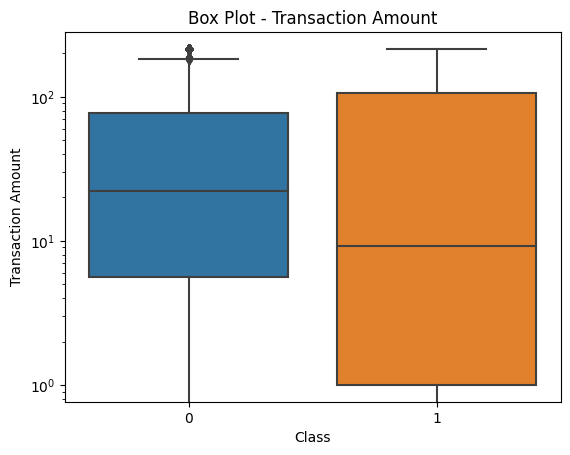

In [17]:
# checking dataset after outlier handling
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.title('Box Plot - Transaction Amount')
plt.show()

### Pair plots

The scatterplots show the relationship between two variables, while the histograms display the distribution of each variable individually. By examining the scatterplots, you can get an idea of the correlation between two variables: positive correlation (points tend to go upward), negative correlation (points tend to go downward), or no correlation (points are scattered without a clear trend).

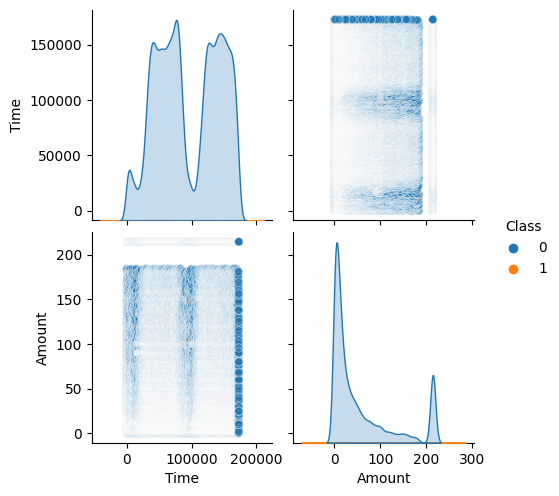

In [18]:
sns.pairplot(df, vars=['Time', 'Amount'], hue='Class', plot_kws={'alpha': 0.5})

### Correlation using Pairplots

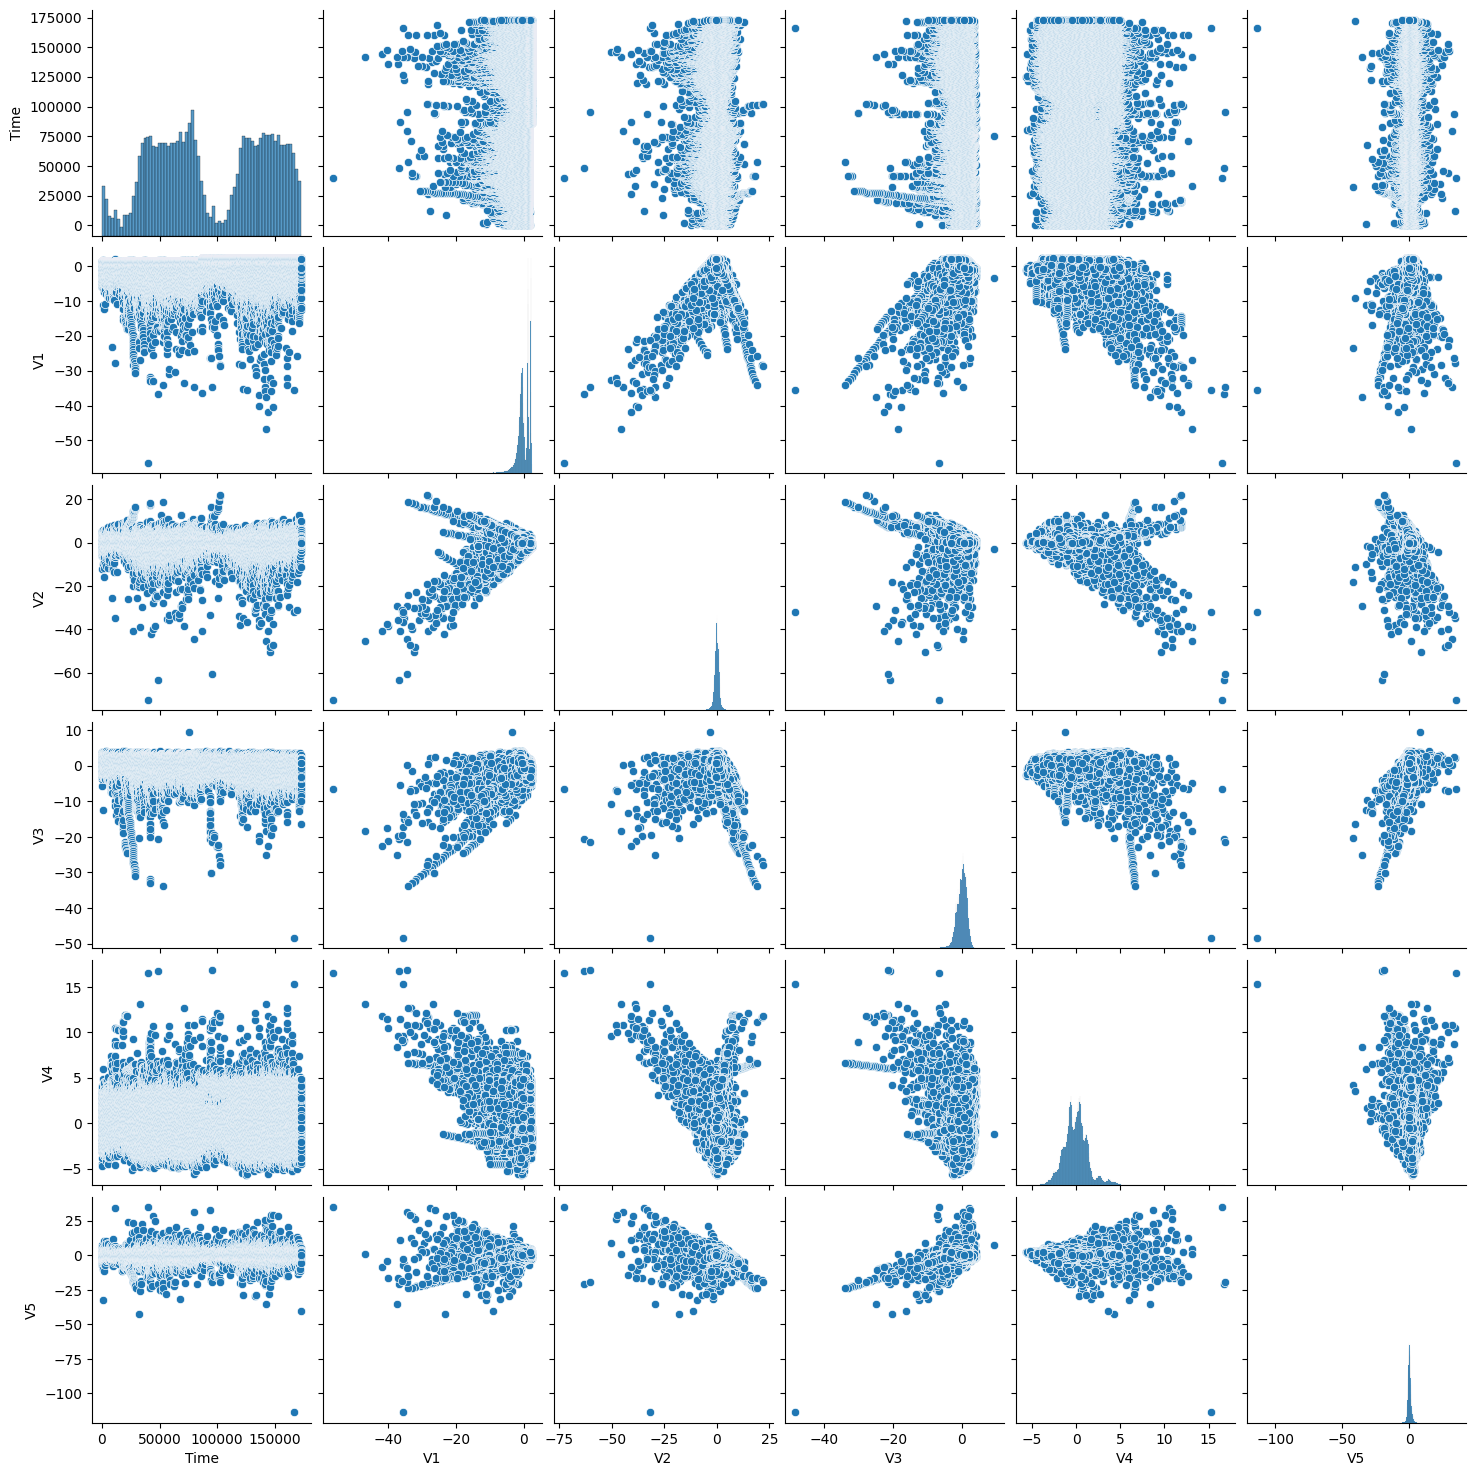

In [19]:
# Select a subset of variables for correlation analysis
selected_vars = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5']

# Create a pair plot for correlation analysis
sns.pairplot(df[selected_vars])

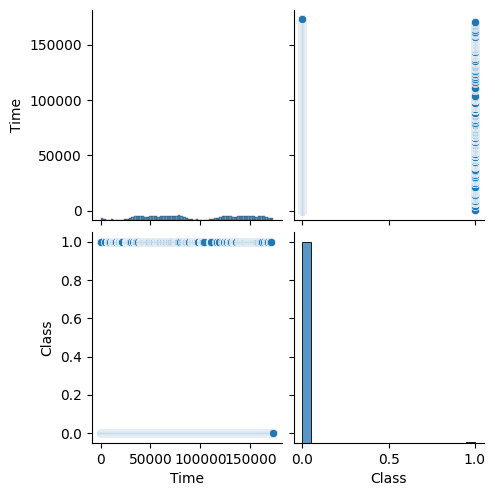

In [20]:
# Select a subset of variables for correlation analysis
selected_vars = ['Time', 'Class']

# Create a pair plot for correlation analysis
sns.pairplot(df[selected_vars])

## Model Building

In [21]:
# Train Test Split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# handling imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts())

Original class distribution: 0    227451
1       394
Name: Class, dtype: int64
Resampled class distribution: 0    227451
1    227451
Name: Class, dtype: int64


<BarContainer object of 2 artists>

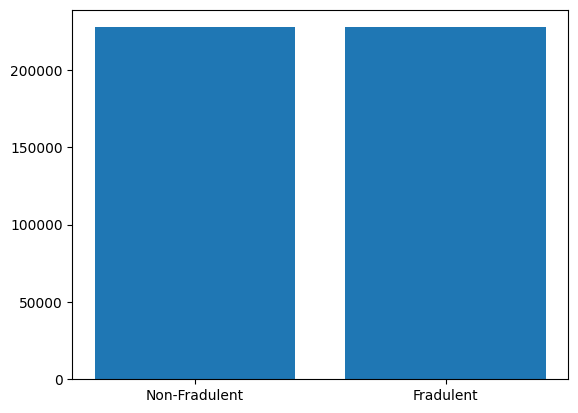

In [24]:
resampled_values = pd.Series(y_train_resampled).value_counts()

plt.bar(['Non-Fradulent', 'Fradulent'], [resampled_values[0], resampled_values[1]])

### Random Forest 

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
cr1 = classification_report(y_test, y_pred)
print(cr1)

Confusion Matrix:
[[56852    12]
 [   16    82]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [27]:
from sklearn.metrics import accuracy_score
print('Random Forest Model Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Random Forest Model Accuracy: 0.9995


### XGBoost

In [28]:
import xgboost as xgb

# define data_dmatrix
# data_dmatrix = xgb.DMatrix(data=X,label=y)

The dataset is converted into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [29]:
# split X and y into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

In [32]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
cr2 = classification_report(y_test, y_pred)
print(cr2)

Confusion Matrix:
[[56848    16]
 [   14    84]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.86      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [33]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9995


### SVM Classifier

In [34]:
# from sklearn.svm import SVC

In [35]:
# svc_clf = SVC()
# svc_clf.fit(X_train_resampled, y_train_resampled)

In [36]:
# y_pred = svc_clf.predict(X_test)

In [37]:
# from sklearn.metrics import classification_report, confusion_matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("\nClassification Report:")
# cr3 = classification_report(y_test, y_pred)
# print(cr3)

In [38]:
# print('SVM model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

### Comparing the Models

In [42]:
true_labels = y_test
rf_predicted = clf.predict(X_test)
xgb_predicted = xgb_clf.predict(X_test)

In [43]:
# Generate classification report for each model
model1_report = classification_report(true_labels, rf_predicted, output_dict=True)
model2_report = classification_report(true_labels, xgb_predicted, output_dict=True)

df1 = pd.DataFrame({
    'Model': ['Random Forest', 'XGB Classifier'],
    'Precision': [model1_report['macro avg']['precision'], model2_report['macro avg']['precision']],
    'Recall': [model1_report['macro avg']['recall'], model2_report['macro avg']['recall']],
    'F1-Score': [model1_report['macro avg']['f1-score'], model2_report['macro avg']['f1-score']],
    'Support': [model1_report['macro avg']['support'], model2_report['macro avg']['support']],
    'Accuracy': [accuracy_score(y_test, rf_predicted), accuracy_score(y_test, xgb_predicted)]
})

df1

,Model,Precision,Recall,F1-Score,Support,Accuracy
0,Random Forest,0.936030,0.918262,0.926960,56962,0.999508
1,XGB Classifier,0.919877,0.928431,0.924111,56962,0.999473
